# PROBLEM 3
The house price prediction dataset provided is kaggle competition dataset. It has train and test set, however, the values of the target variable for the test set were not provided since the competition is about predicting those values. Since I need these values to calculate the RMSE for my models, I decided to instead, split the train set into train and test set. I used the train set to fit the model, used the model on the test set and calculated the RMSE. The workflow includes a bit od exploratory data analysis, data wrangling (missing value handling and on-hot-encoding), model training and prediction.

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [215]:
df = pd.read_csv("train.csv")

In [216]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EXPLORATORY DATA ANALYSIS
## I will carry out some basic EDA to have high level understanding of the data. This is just to help me understand the kind of preprocessing needed

In [218]:
# thd dataset has mixture of integer and object data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [219]:
# Descriptive statistics for the numeric column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [220]:
#correlation of each of the predictors with the target variable
df.select_dtypes(include=['number']).corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

<Axes: >

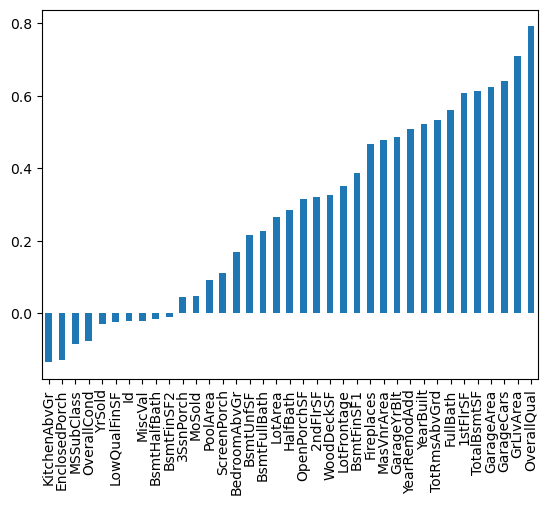

In [221]:
#visuals for correlation of predictors with the target variable
df.select_dtypes(include=['number']).corr()['SalePrice'].sort_values().drop('SalePrice').plot(kind='bar')

## I will briefly explore the relationship of the predictors that are highly correlated with price

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

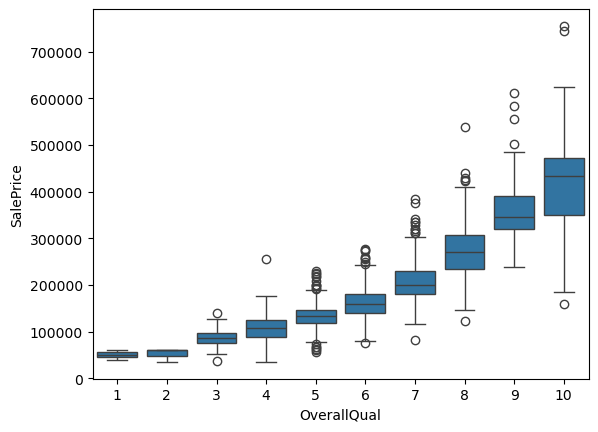

In [223]:
# Overall quality increase with price
sns.boxplot(x='OverallQual',y='SalePrice',data=df)

<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

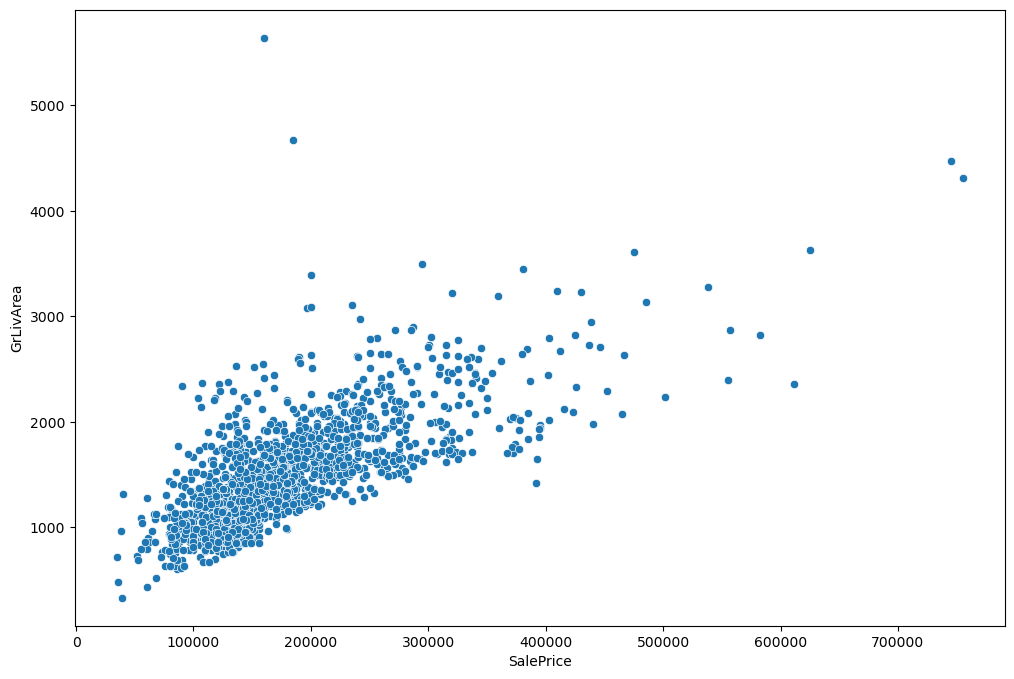

In [224]:
# GRLivArea increase with price
plt.figure(figsize=(12,8))
sns.scatterplot(x='SalePrice',y='GrLivArea',data=df)

## There are lots to explore but the project is not on exploratory data analysis, hence I will stop the EDA at this point

# DATA WRANGLING
### Data wrangling is neccessary to transform the data into a form that can be used to fit machine learning model

## exploring missing values

In [228]:
#First step is missing value handling
# number of missing values per column
missing_values = df.isnull().sum()

In [229]:
print(missing_values)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [230]:
# percentatge of missing values per columns
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [231]:
# function for data wrangling/preprocessing
def pre_process(df):
    # only 17% of LotFraontage is missing and the columns is numeric hence we just replace missing values with column mean
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())
    # Handling the "missing values" in ally
    # fill NAN with "No_Alley_Access"
    df["Alley"] = df["Alley"].fillna("No_Alley_Access")
    # fill NAN with "No_Alley_Access"
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    # numerica column with only 0.5% missing values so we replace missing values with column mean
    df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())
    df["BsmtQual"] = df["BsmtQual"].fillna("No_basement")
    # fill NAN with no basement
    df["BsmtCond"] = df["BsmtCond"].fillna("No_basement")
    #fill NAN similarly for other columns
    df["BsmtExposure"] = df["BsmtExposure"].fillna("No_basement")
    df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No_basement")
    df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No_basement")
    df["FireplaceQu"]= df["FireplaceQu"].fillna("No_fireplace")
    df["GarageType"] = df["GarageType"].fillna("No_garage")
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna("No_garage")
    df["GarageFinish"] = df["GarageFinish"].fillna("No_garage")
    df["GarageQual"] = df["GarageQual"].fillna("No_garage")
    df["GarageCond"] = df["GarageCond"].fillna("No_garage")
    # I drop PoolQC, Fence and Miscfeature because they have almost a single unique value each hence they can't contribute to prediction
    df = df.drop(["PoolQC", "Fence", "MiscFeature"], axis = 1)
    #replace all whitespace with _
    df.columns = df.columns.str.replace(' ', '_')
    # replace white space in non-numerical columns with _
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.replace(' ', '_')
    df = pd.get_dummies(df, drop_first=True)
    df = df.astype(int)
    return df

In [232]:
# apply the function for data wrangling
df = pre_process(df)

In [233]:
df.shape

(1460, 249)

In [234]:
# all 249 columns now have numerical datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 249 entries, Id to SaleCondition_Partial
dtypes: int32(249)
memory usage: 1.4 MB


# TRAIN TEST SPLIT
Coding from the scrash (without using scikitlearn)

In [254]:
# function for splitting dataset into training and test set
def train_test_split(data, target_column, train_ratio=0.8):
    
    # Shuffle the data
    data = data.sample(frac=1).reset_index(drop=True)
    
    # Calculate the number of training samples
    train_size = int(train_ratio * len(data))
    
    # Split the dataset into training and testing sets
    train_data = data[:train_size]
    test_data = data[train_size:]
    
    # Separate features (X) and target (y)
    X_train = train_data.drop(columns=[target_column])
    y_train = train_data[target_column]
    X_test = test_data.drop(columns=[target_column])
    y_test = test_data[target_column]
    
    return X_train, y_train, X_test, y_test

# applying the function
X_train, y_train, X_test, y_test = train_test_split(df, target_column='SalePrice', train_ratio=0.8)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1168, 248)
y_train shape: (1168,)
X_test shape: (292, 248)
y_test shape: (292,)


# TRAINING WITH LINEAR BASIS FUNCTION

In [256]:
def ridge_regression(X_train, y_train, X_test, y_test, lambda_param=1.0):
    # Step 1: Add bias (intercept) term to the training and test data
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

    # Step 2: Compute the weights using Ridge Regression
    I = np.eye(X_train_bias.shape[1])
    theta = np.linalg.inv(X_train_bias.T @ X_train_bias + lambda_param * I) @ X_train_bias.T @ y_train

    # Step 3: Predict values for the test set
    y_pred = X_test_bias @ theta

    # Step 4: Calculate the Root Mean Square Error (RMSE)
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    return rmse, theta

In [258]:
ridge_regression(X_train, y_train, X_test, y_test, lambda_param=1.0)

(31429.926917824523,
 array([ 4.93972808e+02, -1.91254569e+00, -1.23327711e+02, -1.33619565e+02,
         5.69645934e-01,  8.91990494e+03,  4.58349056e+03,  1.55242130e+02,
         6.65211588e+01,  1.61173256e+01, -3.73808857e+00,  5.04514418e+00,
        -4.24379483e+00, -2.93648653e+00,  9.83461387e+00,  1.30538017e+01,
         8.20639150e+00,  3.10949640e+01,  5.26617983e+03,  1.97745048e+03,
         6.29537226e+03,  1.90041402e+02, -2.80753423e+03, -1.14285921e+04,
         4.17334083e+03,  7.59063005e+03,  1.16100504e+04,  6.25351300e-01,
         1.73157597e+01,  2.75326128e+00,  1.90396027e+01,  4.09618605e+01,
         5.17220763e+01, -6.25887576e+01,  1.53684811e+00, -3.53522873e+02,
        -2.42376197e+02,  2.38695501e+04,  1.60887632e+04,  1.60816784e+04,
         1.34289850e+04,  2.63310395e+04, -3.11325756e+02, -2.11170840e+03,
         2.51660830e+03, -1.34483123e+04,  6.41265291e+02,  1.51091000e+04,
         5.08194405e+03,  1.35450027e+04, -2.57884798e+04,  7.25061

# TRAINING WITH GUASSIAN BASIS FUNCTION

In [260]:
# Gaussian basis function
def gaussian_basis_function(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Transform the dataset using Gaussian basis functions
def transform_with_gaussian_basis(X, mus, sigma):
    n_samples, n_features = X.shape
    n_basis = mus.shape[0]
    
    # Initialize an empty transformed matrix (n_samples, n_basis * n_features)
    X_transformed = np.zeros((n_samples, n_basis * n_features))

    for j in range(n_features):
        # Apply Gaussian transformation for each feature independently
        for i, mu in enumerate(mus[:, j]):
            X_transformed[:, i + j * n_basis] = gaussian_basis_function(X.iloc[:, j].values, mu, sigma)

    return X_transformed

# Linear Regression using Normal Equation
def linear_regression_gaussian_basis(X_train, y_train, X_test, y_test, mus, sigma):
    # Step 1: Transform the training and test data using Gaussian basis functions
    X_train_transformed = transform_with_gaussian_basis(X_train, mus, sigma)
    X_test_transformed = transform_with_gaussian_basis(X_test, mus, sigma)

    # Add bias term (intercept) to the transformed data
    X_train_bias = np.c_[np.ones(X_train_transformed.shape[0]), X_train_transformed]
    X_test_bias = np.c_[np.ones(X_test_transformed.shape[0]), X_test_transformed]

    # Step 2: Compute the weights using the guassian equation
    try:
        theta = np.linalg.pinv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train.values  # Convert y_train to a numpy array
    except np.linalg.LinAlgError as e:
        print(f"Error in computing theta: {e}")
        return None, None, None

    # Step 3: Predict values for X_test
    y_pred = X_test_bias @ theta

    # Step 4: Calculate the Root Mean Square Error (RMSE)
    rmse = np.sqrt(np.mean((y_test.values - y_pred) ** 2))  # Convert y_test to a numpy array

    return rmse, theta, y_pred

# Example Usage:
# Assuming X_train, y_train, X_test, y_test are Pandas DataFrames
n_features = X_train.shape[1]  # Number of features in X_train
mus = np.zeros((10, n_features))  # Initialize an array of 10 centers for each feature

# For each feature, compute 10 centers based on the min and max values of the feature
for i in range(n_features):
    mus[:, i] = np.linspace(X_train.iloc[:, i].min(), X_train.iloc[:, i].max(), 10)

sigma = 1.0  # Standard deviation of the Gaussian basis functions

rmse, theta, y_pred = linear_regression_gaussian_basis(X_train, y_train, X_test, y_test, mus, sigma)

print(f"Root Mean Square Error (RMSE) on test data: {rmse}")
print(f"Model parameters (theta): {theta}")


Root Mean Square Error (RMSE) on test data: 482447.8731942825
Model parameters (theta): [   985.02112166 -13094.02270089   7063.50592527 ... -10547.38004218
 -14323.70438258 -18195.67003571]


## Comment
### The regression model with linear basis function performed far better than the one with 
Guassian basis function. The RMSE for the model with linear basis function is 31429.927 while that of the model with Guassian basis function is 482447.873 This performance difference can be attributed to the nature of relationship between the predictors and target variable whhich is obviously a linear relationship (observe from the scatterplots). So, the regression model with linear basis function is more appropriate for this problem.

# PROBLEM 4

### Winners of the Nobel Prize in Physics for 2024
The 2024 Nobel Prize in Physics has been awarded to John Hopfield and Geoffrey Hinton for their groundbreaking contributions to the development of artificial neural networks. This recognition highlights their influential work in combining principles from physics with neuroscience, ultimately shaping modern advancements in machine learning and artificial intelligence

### Their Research Areas Are:
 - *John Hopfield* is renowned for developing the Hopfield network, an early model of artificial neural networks that mimics associative memory in biological systems. His work laid the groundwork for understanding how neural connections can be strengthened to enable memory recall even from incomplete information.

 - *Geoffrey Hinton*, often referred to as the "Godfather of AI," expanded upon Hopfield's ideas and was instrumental in popularizing neural networks in machine learning, notably through the Boltzmann Machine. His research has propelled advancements in various applications, including image
classification and natural language processing

### My Thoughts
The emergence of these concepts will continue to shape research across multiple fields. As neural networks become increasingly sophisticated, they are expected to revolutionize areas such as:

 - Medical Imaging: Enhancing diagnostic accuracy through better image analysis algorithms.
Materials Science: Optimizing the discovery of new materials by predicting properties and behaviors based on data​
AIP
.
 - General AI: Advancing the development of more capable artificial intelligence systems that can learn and adapt in complex environments​
PRINCETON UNIVERSITY
.
Overall, Hopfield's and Hinton's work illustrates the powerful synergy between physics and biology, which not only enriches theoretical understanding but also has practical implications that are set to redefine technological landscapes in the years to come.

Source: https://ww2.aip.org/aip/celebrating-2024-nobel-physics-prize